Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force.

During the covid-19 period there was a sharp increase in the unemployment rate.

The aim is to analyze the unemployment rate using python.
Goal:

This analysis focuses on evaluating the far-reaching impacts of the COVID-19 pandemic on India's employment landscape. The dataset at hand provides essential insights into the fluctuations of unemployment rates among different states in India. Within the dataset, vital indicators including State-wise breakdown, timeline, measurement frequency, Estimated Unemployment Rate (%), Estimated Employed Individuals, and Estimated Labour Participation Rate (%) are encompassed.

Dataset Overview:
The provided dataset delves into the unemployment landscape across diverse states in India:

States: Various states constituting the Indian subcontinent.
Date: The specific dates of unemployment rate recordings.
Measuring Frequency: The regularity of measurement collection (Monthly).
Estimated Unemployment Rate (%): The proportion of unemployed individuals in each Indian state.
Estimated Employed Individuals: The tally of presently engaged individuals.
Estimated Labour Participation Rate (%): The percentage of the working-age populace (16-64 years) actively involved in the job market, including both employed individuals and those actively seeking jobs.
This dataset serves as a valuable resource for comprehending the unemployment variations across India's states throughout the COVID-19 pandemic. By offering crucial insights, it illuminates the repercussions on unemployment rates, employment numbers, and labor participation proportions in distinct geographical regions across the nation. The analysis aims to provide insights into the pandemic's socio-economic effects on India's workforce and labor arena.

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar 
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\khare\OneDrive\Desktop\python projects\Unemployment_Rate_upto_11_2020.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [3]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


**Renaming the attributes**

Region = state

Date = date

Frequency = frequency

Estimated Unemployment Rate (%) = estimated unemployment rate

Estimated Employed = estimated employment

Estimated Labour Participation Rate (%) = estimated labour participation rate

Region.1 = region

longitude = longitude

latitude = latitude


**Updating column names:**

In [5]:
df.columns = ['state','date','frequency','estimated unemployment rate','estimated employed','estimated labour participation rate','region','longitude','latitude']
df.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


**Revealing basic information of the dataset**

In [6]:
df.shape

(267, 9)

In [7]:
df.columns

Index(['state', 'date', 'frequency', 'estimated unemployment rate',
       'estimated employed', 'estimated labour participation rate', 'region',
       'longitude', 'latitude'],
      dtype='object')

In [8]:
df.describe()

,estimated unemployment rate,estimated employed,estimated labour participation rate,longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [9]:
df.isnull().sum()

state                                  0
date                                   0
frequency                              0
estimated unemployment rate            0
estimated employed                     0
estimated labour participation rate    0
region                                 0
longitude                              0
latitude                               0
dtype: int64

In [10]:
df.duplicated().any()

np.False_

In [11]:
df.state.value_counts()

state
Andhra Pradesh      10
Assam               10
Bihar               10
Chhattisgarh        10
Delhi               10
Goa                 10
Gujarat             10
Haryana             10
Himachal Pradesh    10
Jharkhand           10
Karnataka           10
Rajasthan           10
Kerala              10
Madhya Pradesh      10
Maharashtra         10
Meghalaya           10
Odisha              10
Puducherry          10
Punjab              10
Uttarakhand         10
Tamil Nadu          10
Telangana           10
Tripura             10
West Bengal         10
Uttar Pradesh       10
Jammu & Kashmir      9
Sikkim               8
Name: count, dtype: int64

**Changing the datatype of 'date' from object to datetime**

In [12]:
df['date'] = pd.to_datetime(df['date'],dayfirst = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   state                                267 non-null    object        
 1   date                                 267 non-null    datetime64[ns]
 2   frequency                            267 non-null    object        
 3   estimated unemployment rate          267 non-null    float64       
 4   estimated employed                   267 non-null    int64         
 5   estimated labour participation rate  267 non-null    float64       
 6   region                               267 non-null    object        
 7   longitude                            267 non-null    float64       
 8   latitude                             267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 18.9+ KB


**Extracting month from date attribute**


In [13]:
df['month_int'] = df['date'].dt.month
df.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude,month_int
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5


**The months are in integer datetype. We need to convert the months into words for better analysis**

In [14]:
df['month'] = df['month_int'].apply(lambda x: calendar.month_abbr[x])
df.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude,month_int,month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


**Numeric data grouped by months**

**Bar plot of unemployment rate and labour participation rate**

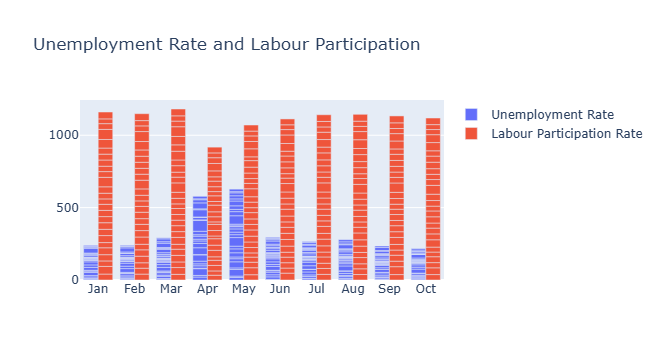

In [17]:
#import pandas as pd
#import plotly.graph_objects as go
import plotly.io as pio

# Optional: Set renderer for Jupyter Notebook
#pio.renderers.default = "notebook_connected"

# Load data
#data = pd.read_csv("your_data.csv")  # Replace with your actual file path

# Extract columns
month = df['month']
unemployment_rate = df['estimated unemployment rate']
labour_participation_rate = df['estimated labour participation rate']

# Create Plotly bar chart
fig = go.Figure()

fig.add_trace(go.Bar(x=month, y=unemployment_rate, name='Unemployment Rate'))
fig.add_trace(go.Bar(x=month, y=labour_participation_rate, name='Labour Participation Rate'))

fig.update_layout(
    title='Unemployment Rate and Labour Participation',
    xaxis={
        'categoryorder': 'array',
        'categoryarray': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
    },
    barmode='group'
)

# Show interactive plot in Jupyter Notebook
fig.show()

# Save static image for GitHub README
fig.write_image("unemployment_plot.png")


**Bar plot of estimated employed citizen in every month**

In [18]:
import plotly.express as px

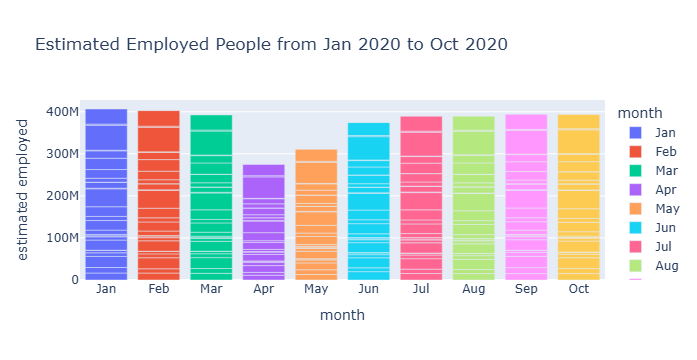

In [20]:
# Create the bar chart
fig = px.bar(
    df,
    x='month',
    y='estimated employed',
    color='month',
    category_orders={'month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']},
    title='Estimated Employed People from Jan 2020 to Oct 2020'
)

# Show chart in Jupyter Notebook
fig.show()

# Save chart as image for GitHub README
fig.write_image("estimated_employed.png")

**State wise Analysis**

In [21]:
state =  df.groupby(['state'])[['estimated unemployment rate','estimated employed','estimated labour participation rate']].mean()
state = pd.DataFrame(state).reset_index()

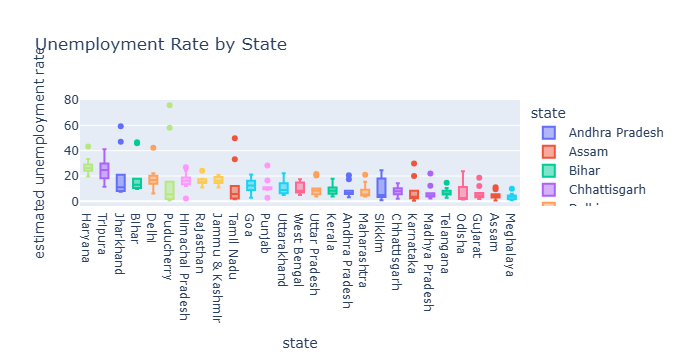

In [22]:
# Create box plot
fig = px.box(
    data_frame=df,
    x='state',
    y='estimated unemployment rate',
    color='state',
    title='Unemployment Rate by State'
)

# Sort x-axis based on total values descending
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Show chart in Jupyter
fig.show()

# Save static image for GitHub README
fig.write_image("unemployment_boxplot.png")

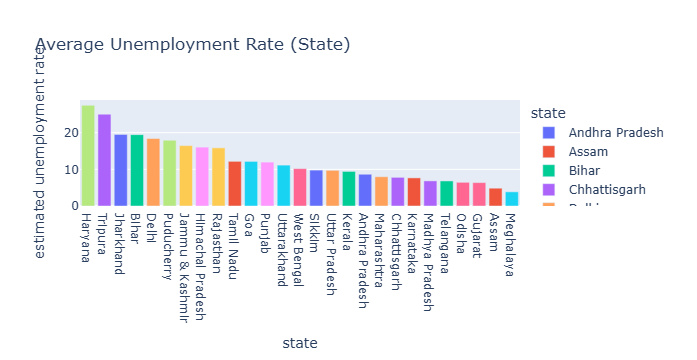

In [23]:
# Create the bar plot
fig = px.bar(
    state,
    x='state',
    y='estimated unemployment rate',
    color='state',
    title='Average Unemployment Rate (State)'
)

# Order bars in descending order
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Show plot in Jupyter
fig.show()

# Save as image for GitHub README
fig.write_image("average_unemployment_rate.png")

Haryana and Tripura were having the highest average amount of Unemployment rate

Meghalaya was having the lowest average amount of Unemployment rate

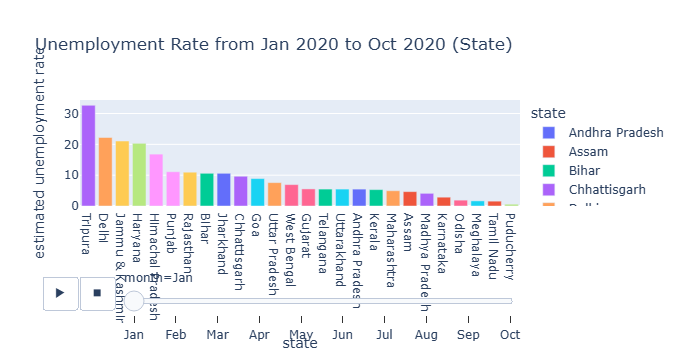

In [25]:
fig = px.bar(
    df,
    x='state',
    y='estimated unemployment rate',
    animation_frame='month',
    color='state',
    title='Unemployment Rate from Jan 2020 to Oct 2020 (State)'
)

# Sort bars in descending order
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Show animation in Jupyter Notebook
fig.show()

oct_data = df[df['month'] == 'Oct']

# Create a static bar chart for GitHub
fig_static = px.bar(
    oct_data,
    x='state',
    y='estimated unemployment rate',
    color='state',
    title='Unemployment Rate in October 2020 (State)'
)

# Sort bars in descending order
fig_static.update_layout(xaxis={'categoryorder': 'total descending'})

# Save static chart as PNG for GitHub README
fig_static.write_image("unemployment_rate_october.png")

**Monthly unemployment rate**

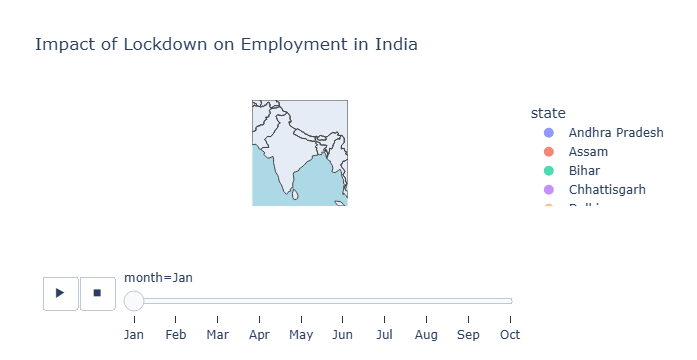

In [31]:
fig = px.scatter_geo(
    df,
    lon='longitude',
    lat='latitude',
    color='state',
    hover_name='state',
    size='estimated unemployment rate',
    animation_frame='month',
    scope='asia',
    title='Impact of Lockdown on Employment in India'
)

# Customize animation speed
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2000

# Map zoom area and style
fig.update_geos(
    lataxis_range=[5, 40],
    lonaxis_range=[65, 100],
    oceancolor='lightblue',
    showocean=True
)

fig.show()

oct_df = df[df['month'] == 'Oct']

fig_static = px.scatter_geo(
    oct_df,
    lon='longitude',
    lat='latitude',
    color='state',
    hover_name='state',
    size='estimated unemployment rate',
    scope='asia',
    title='Unemployment Impact Snapshot - October 2020'
)

fig_static.update_geos(
    lataxis_range=[50, 40],
    lonaxis_range=[65, 100],
    oceancolor='lightblue',
    showocean=True
)

# Save static image for GitHub
fig_static.write_image("unemployment_geo_october.png",scale= 2)



**Regional Analysis**

In [32]:
df.region.unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [33]:
# numeric data grouped by region

region = df.groupby(['region'])[['estimated unemployment rate','estimated employed','estimated labour participation rate']].mean()
region = pd.DataFrame(region).reset_index()